# Perceptron Classifier / CSC 578D / Fall 2018

### Notes:
1. Dataset can be found __[here](http://www.apkc.net/data)__.
1. See notes by hand __[here](http://www.apkc.net)__.

**Author:** Andreas P. Koenzen <akoenzen@uvic.ca>
<br>
**Version:** 0.1

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Bankruptcy example:
- L = is the number of late payments on credit cards over the past year.
- R = is the ratio of earnings to expenses (earnings : expenses).
- Bankrupt = **-1 is NO / 1 is YES**.

In [19]:
data = pd.read_csv("http://www.apkc.net/data/csc_578d/perceptron_1.csv")
data

,L,R,Bankupt
0,3,0.2,-1
1,1,0.3,-1
2,4,0.5,-1
3,2,0.7,-1
4,0,1.0,-1
5,1,1.2,-1
6,1,1.7,-1
7,6,0.2,1
8,7,0.3,1
9,6,0.7,1


### Plot the data:

[Text(0,0.5,'L'), Text(0.5,0,'R')]

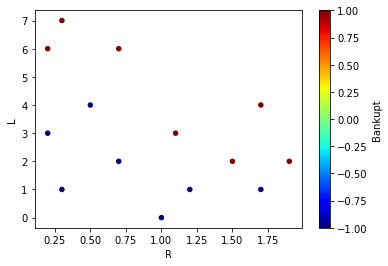

In [101]:
fig, ax = plt.subplots()
data.plot.scatter(x=1, y=0, c=2, colormap='jet', ax=ax)
ax.set(xlabel='R', ylabel='L')
plt.show()

### Compute the weights of the line:

Do N iterations and test the classifier.

In [100]:
iterations = 500

# initialize vector w to all 1.0
# w = np.array([[1.0, 1.0, 1.0]])
w = np.array([[1.0, 1.0, 1.0]])
# w

for k in range(iterations):
    # create vector x: should be feature #2, feature #1, y-intercept or feature #0
    # 1. add the feature #0 to the X vector
    w0 = np.ones((len(data.index), 1), dtype=float)
    x = np.hstack([data.values[:,:2], w0])
    if k + 1 == iterations:
        x

    # 2. create the y vector. the class vector and compute its transpose
    y = np.array([[-1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1]])
    y = y.T
    if k + 1 == iterations:
        y

    # 4. compute the dot product of x.w
    # x @ w.T

    # 5. multiply by y
    # y * (x @ w.T)

    # 6. nudge vector w
    # select instances that evaluate to True (Wrongly classified) and add them to a new array.
    # the line: ((y * (x @ w.T)) < 0).reshape(x.shape[0]) creates a 1D array of boolean values
    # which is used as row evaluation subscript in x. only rows that evaluate to TRUE will
    # be added to the xx array.
    xx = x[((y * (x @ w.T)) < 0).reshape(x.shape[0]), :]
    yy = y[((y * (x @ w.T)) < 0).reshape(x.shape[0]), :]
    # debug
    if k + 1 == iterations:
        ((y * (x @ w.T)) < 0)
        xx
        yy
        
    z = np.sum(yy * xx, axis=0, keepdims=True)
    if k + 1 == iterations:
        z
    
    if k + 1 == iterations:
        nyx = ((yy * xx) * 0.01)
        nyx
    
    w = w + (z * 0.01)
    if k + 1 == iterations:
        w
    
w

array([[3. , 0.2, 1. ],
       [1. , 0.3, 1. ],
       [4. , 0.5, 1. ],
       [2. , 0.7, 1. ],
       [0. , 1. , 1. ],
       [1. , 1.2, 1. ],
       [1. , 1.7, 1. ],
       [6. , 0.2, 1. ],
       [7. , 0.3, 1. ],
       [6. , 0.7, 1. ],
       [3. , 1.1, 1. ],
       [2. , 1.5, 1. ],
       [4. , 1.7, 1. ],
       [2. , 1.9, 1. ]])

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1]])

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

array([], shape=(0, 3), dtype=float64)

array([], shape=(0, 1), dtype=int64)

array([[0., 0., 0.]])

array([], shape=(0, 3), dtype=float64)

array([[ 0.09 ,  0.221, -0.51 ]])

array([[ 0.09 ,  0.221, -0.51 ]])

### Plot the line:

[Text(0,0.5,'L'), Text(0.5,0,'R')]

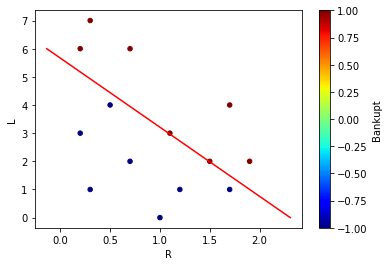

In [108]:
fig, ax = plt.subplots()

# draw the scatter plot
data.plot.scatter(x=1, y=0, c=2, colormap='jet', ax=ax)
ax.set(xlabel='R', ylabel='L')

# draw the line
plt.plot(
    [(-(0.09*k) - (-0.51)) / 0.221 for k in range(7)],
    range(7), 
    c= "red"
)

plt.show()